# DATA MINING PROJECT: Analysis of a Supermarket’s Customers
## 3.2) Predictive Analysis: classification
### *Antonio Strippoli, Valerio Mariani*

In [ ]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)

In [ ]:
def plot(ax, folder="predictive", filename="", figsize=(6.4, 4.8)):
    fig = plt.gcf()
    fig.set_size_inches(*figsize)
    plt.tight_layout()
    if filename:
        path = os.path.join("..", "report", "imgs", folder)
        if not os.path.exists(path):
            os.mkdir(path)
        plt.savefig(os.path.join(path, filename))
    plt.show()
    plt.close()

In [ ]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

def compute_scores(estimator, train_set, test_set, train_label, train_pred, test_label, test_pred):
  train = True
  for label, pred in zip([train_label, test_label], [train_pred, test_pred]):
    if train:
      print("=== TRAINING SET ===")
      train = False
    else:
      print("\n=== TEST SET ===")
    print('Accuracy:', metrics.accuracy_score(label, pred))
    print('Precision:', metrics.precision_score(label, pred, average='weighted'))
    print('Recall:', metrics.recall_score(label, pred, average='weighted'))
    print('F1 Score:', metrics.f1_score(label, pred, average='weighted'))
    print('Support:', metrics.precision_recall_fscore_support(label, pred))
  
  print("\n=== CLASSIFICATION REPORT ===")
  print(metrics.classification_report(
      test_label,
      test_pred,
      target_names=['low-spending', 'medium-spending', 'high-spending']
    )
  )

  print("\n=== CONFUSION MATRIX ===")
  metrics.plot_confusion_matrix(estimator, test_set, test_label)
  plt.show()

In [ ]:
# Load dataset
cldf = pd.read_csv("customer_classification.csv", index_col=0)
cldf

,Monetary,MaxSale,MeanSale,E-Sale,TotItems,MaxItems,MeanItems,UniqueItems,MeanItemSale,Cat0,Cat1,Cat2,Labels
CustomerID,,,,,,,,,,,,,
12347,711,711,711,4.76,319,319,319,31,3,186,133,0,2
12348,892,892,892,1.37,1254,1254,1254,13,7,1248,0,6,1
12352,144,144,144,1.56,26,26,26,5,12,12,9,5,1
12356,2271,2271,2271,4.39,1216,1216,1216,36,4,956,198,62,2
12359,1109,1109,1109,5.13,356,356,356,47,5,160,165,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18263,307,307,307,3.59,328,328,328,15,1,316,12,0,1
18272,340,340,340,4.24,276,276,276,22,1,232,44,0,1
18273,153,102,76,-0.00,60,40,30,1,2,0,60,0,0


In [ ]:
# Split the dataset into training set and test set
from sklearn.model_selection import train_test_split

label = cldf.pop('Labels')
train_set, test_set, train_label, test_label = train_test_split(cldf, label, stratify=label, test_size=.3)

### Decision Tree

In [ ]:
# We define a Decision Tree based on the result of a Grid Search
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Model validation
params = {
    'criterion': ['gini','entropy'],
    'max_depth': list(range(10,31)),
    'max_leaf_nodes': list(range(2, 51)),
    'min_samples_split': list(range(1, 5)),
    'splitter': ['best', 'random'],
    'class_weight': ['balanced', None, {0: 0.1, 1: 0.3, 2: 0.6}]
}
dt = DecisionTreeClassifier(random_state=22)

grid_search_cv = GridSearchCV(dt, params, verbose=1, cv=3, n_jobs=-1)
grid_search_cv.fit(train_set, train_label)

dt = grid_search_cv.best_estimator_
dt

Fitting 3 folds for each of 49392 candidates, totalling 148176 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 6760 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 12360 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 19560 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 28360 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 38760 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 50760 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 64360 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 79560 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 96360 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 114760 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 134760 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 148176 out of 148176 | elapsed: 12.7min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

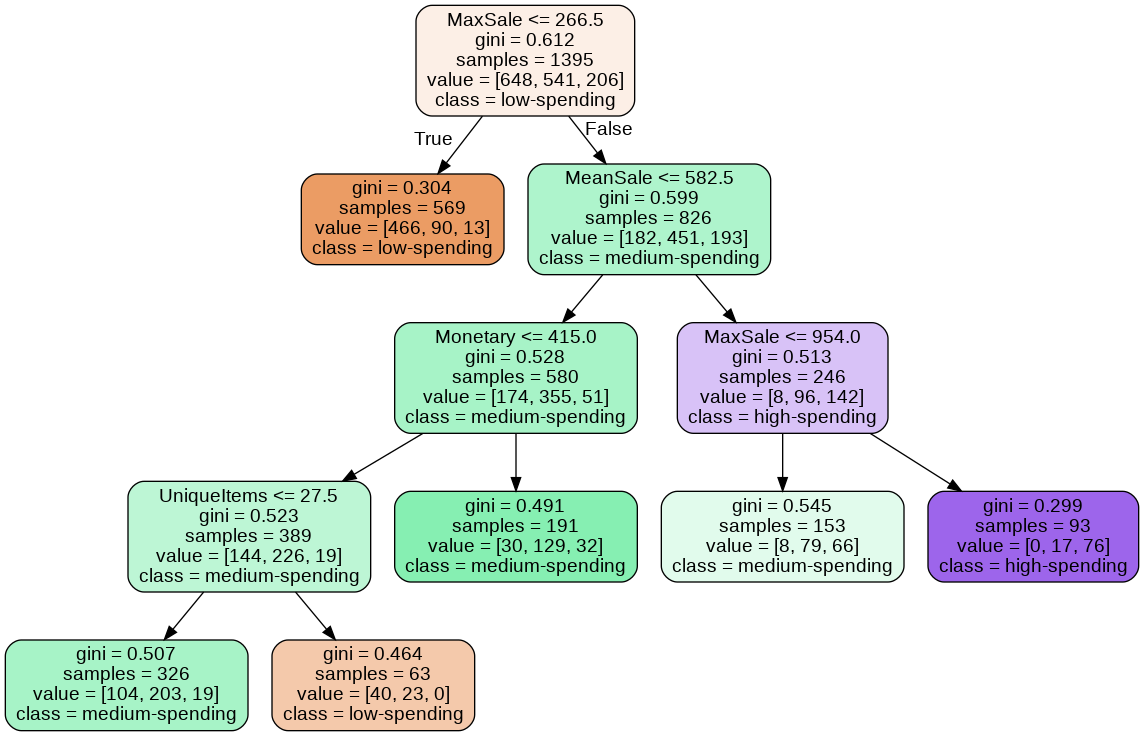

In [ ]:
# Visualize the actual decision tree obtained 
import pydotplus 
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(
  dt,
  out_file=None,
  feature_names=list(train_set.columns),
  class_names=['low-spending', 'medium-spending', 'high-spending'],
  filled=True,
  rounded=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# Predict using the decision tree
train_pred = dt.predict(train_set)
test_pred = dt.predict(test_set)

=== TRAINING SET ===
Accuracy: 0.7118279569892473
Precision: 0.7304812736794898
Recall: 0.7118279569892473
F1 Score: 0.7055671938653154
Support: (array([0.80063291, 0.61343284, 0.8172043 ]), array([0.7808642 , 0.75970425, 0.36893204]), array([0.790625  , 0.67877787, 0.5083612 ]), array([648, 541, 206]))

=== TEST SET ===
Accuracy: 0.7195325542570952
Precision: 0.7398589316905815
Recall: 0.7195325542570952
F1 Score: 0.7169942127747094
Support: (array([0.81749049, 0.6137931 , 0.82608696]), array([0.77060932, 0.76724138, 0.43181818]), array([0.79335793, 0.68199234, 0.56716418]), array([279, 232,  88]))

=== CLASSIFICATION REPORT ===
                 precision    recall  f1-score   support

   low-spending       0.82      0.77      0.79       279
medium-spending       0.61      0.77      0.68       232
  high-spending       0.83      0.43      0.57        88

       accuracy                           0.72       599
      macro avg       0.75      0.66      0.68       599
   weighted avg   

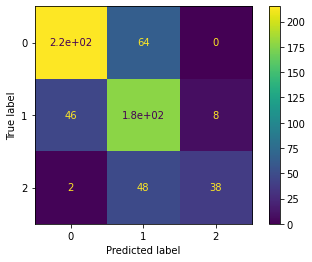

In [ ]:
compute_scores(dt, train_set, test_set, train_label, train_pred, test_label, test_pred)

### RANDOM FOREST

In [ ]:
# We define a Random Forest based on the result of a Grid Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_dist = {
  "max_depth": list(range(2, 20)),
  "min_samples_split": list(range(1, 10)),
  "min_samples_leaf": list(range(1, 10)),
  "bootstrap": [True, False],
  "criterion": ["entropy", "gini"],
  "class_weight": ['balanced', None, {0: 0.1, 1: 0.3, 2: 0.6}]
}
clf = RandomForestClassifier(n_estimators=30)

grid_search = GridSearchCV(clf, param_dist, verbose=1, cv=3, n_jobs=-1)
grid_search.fit(train_set, train_label)

dt = grid_search.best_estimator_
dt

Fitting 3 folds for each of 17496 candidates, totalling 52488 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 6388 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 9988 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 12088 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 14388 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 16888 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 19588 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 22488 tasks  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Predict using the decision tree
train_pred = dt.predict(train_set)
test_pred = dt.predict(test_set)

=== TRAINING SET ===
Accuracy: 0.7347670250896058
Precision: 0.7455939503737229
Recall: 0.7347670250896058
F1 Score: 0.734243379536753
Support: (array([0.82055465, 0.64385692, 0.77697842]), array([0.77623457, 0.76524954, 0.52427184]), array([0.79777954, 0.69932432, 0.62608696]), array([648, 541, 206]))

=== TEST SET ===
Accuracy: 0.7161936560934892
Precision: 0.7286985365393936
Recall: 0.7161936560934892
F1 Score: 0.7172774494856475
Support: (array([0.828125  , 0.61290323, 0.71875   ]), array([0.75985663, 0.73706897, 0.52272727]), array([0.79252336, 0.66927593, 0.60526316]), array([279, 232,  88]))

=== CLASSIFICATION REPORT ===
                 precision    recall  f1-score   support

   low-spending       0.83      0.76      0.79       279
medium-spending       0.61      0.74      0.67       232
  high-spending       0.72      0.52      0.61        88

       accuracy                           0.72       599
      macro avg       0.72      0.67      0.69       599
   weighted avg    

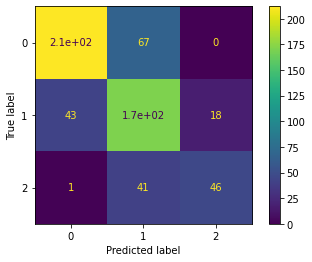

In [ ]:
compute_scores(dt, train_set, test_set, train_label, train_pred, test_label, test_pred)

### Naive Bayes

In [ ]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_set, train_label)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predict using the decision tree
train_pred = gnb.predict(train_set)
test_pred = gnb.predict(test_set)

=== TRAINING SET ===
Accuracy: 0.6394265232974911
Precision: 0.6337619167995503
Recall: 0.6394265232974911
F1 Score: 0.6198464217740053
Support: (array([0.65217391, 0.59042553, 0.68965517]), array([0.87962963, 0.4103512 , 0.48543689]), array([0.74901445, 0.48418757, 0.56980057]), array([648, 541, 206]))

=== TEST SET ===
Accuracy: 0.67779632721202
Precision: 0.6723769195222014
Recall: 0.67779632721202
F1 Score: 0.6610987736483457
Support: (array([0.69041096, 0.63636364, 0.71014493]), array([0.90322581, 0.45258621, 0.55681818]), array([0.7826087 , 0.52896725, 0.62420382]), array([279, 232,  88]))

=== CLASSIFICATION REPORT ===
                 precision    recall  f1-score   support

   low-spending       0.69      0.90      0.78       279
medium-spending       0.64      0.45      0.53       232
  high-spending       0.71      0.56      0.62        88

       accuracy                           0.68       599
      macro avg       0.68      0.64      0.65       599
   weighted avg       

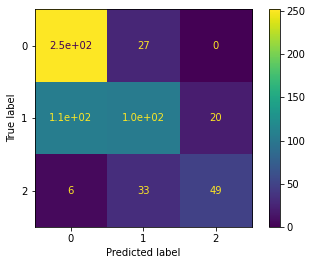

In [ ]:
compute_scores(gnb, train_set, test_set, train_label, train_pred, test_label, test_pred)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30],
    'weights': ['uniform', 'distance'],
    'algorithm': [ 'ball_tree', 'kd_tree', 'brute' ],
    'metric': ['minkowski'],
    'p': [1,2]  # 1=manhattan, 2=euclidean
}
knn = KNeighborsClassifier()
# knn = KNeighborsClassifier( algorithm='auto',metric='minkowski',n_neighbors=30,p=2,weights='distance').fit(train_set, train_label)

grid_search_cv = GridSearchCV(knn, params, verbose=1, cv=3, n_jobs=-1)
grid_search_cv.fit(train_set, train_label)

knn = grid_search_cv.best_estimator_
knn

Fitting 3 folds for each of 204 candidates, totalling 612 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 612 out of 612 | elapsed:    8.7s finished


KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [ ]:
# Predict using the decision tree
train_pred = knn.predict(train_set)
test_pred = knn.predict(test_set)

=== TRAINING SET ===
Accuracy: 0.6982078853046595
Precision: 0.7052122070298633
Recall: 0.6982078853046595
F1 Score: 0.6962409587085117
Support: (array([0.77691108, 0.61093248, 0.72727273]), array([0.76851852, 0.70240296, 0.46601942]), array([0.77269201, 0.65348237, 0.56804734]), array([648, 541, 206]))

=== TEST SET ===
Accuracy: 0.7128547579298832
Precision: 0.7174648958309512
Recall: 0.7128547579298832
F1 Score: 0.7136528501240654
Support: (array([0.81111111, 0.6171875 , 0.68493151]), array([0.78494624, 0.68103448, 0.56818182]), array([0.79781421, 0.64754098, 0.62111801]), array([279, 232,  88]))

=== CLASSIFICATION REPORT ===
                 precision    recall  f1-score   support

   low-spending       0.81      0.78      0.80       279
medium-spending       0.62      0.68      0.65       232
  high-spending       0.68      0.57      0.62        88

       accuracy                           0.71       599
      macro avg       0.70      0.68      0.69       599
   weighted avg   

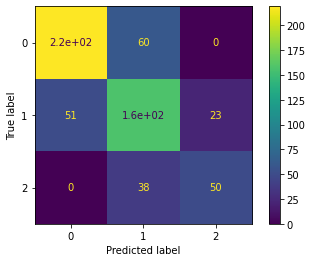

In [ ]:
compute_scores(knn, train_set, test_set, train_label, train_pred, test_label, test_pred)

### SVC

In [ ]:
from sklearn.svm import SVC

params = {
    'C': np.append( np.arange(0.01,0.9,0.1),0),
    'kernel': [ 'rbf', 'sigmoid'],
    'gamma': ['scale','auto'],
    'coef0': np.arange(0.01,0.9,0.1),
    'shrinking': [True,False],
}
svm = SVC(probability=True, random_state=22)

grid_search_cv = GridSearchCV(svm, params, verbose=1, cv=3, n_jobs=-1)
grid_search_cv.fit(train_set, train_label)

svm = grid_search_cv.best_estimator_
# {'C': 0.55, 'coef0': 0.01, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}
svm

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  5.6min finished


SVC(C=0.81, break_ties=False, cache_size=200, class_weight=None, coef0=0.01,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=22, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predict using the decision tree
train_pred = svm.predict(train_set)
test_pred = svm.predict(test_set)

=== TRAINING SET ===
Accuracy: 0.7017921146953405
Precision: 0.7116275491787477
Recall: 0.7017921146953405
F1 Score: 0.7001316450344897
Support: (array([0.78938907, 0.61119751, 0.73076923]), array([0.75771605, 0.72643253, 0.46116505]), array([0.77322835, 0.66385135, 0.56547619]), array([648, 541, 206]))

=== TEST SET ===
Accuracy: 0.7212020033388982
Precision: 0.7309149281530457
Recall: 0.7212020033388982
F1 Score: 0.7215338329913086
Support: (array([0.81273408, 0.62222222, 0.75806452]), array([0.77777778, 0.72413793, 0.53409091]), array([0.79487179, 0.66932271, 0.62666667]), array([279, 232,  88]))

=== CLASSIFICATION REPORT ===
                 precision    recall  f1-score   support

   low-spending       0.81      0.78      0.79       279
medium-spending       0.62      0.72      0.67       232
  high-spending       0.76      0.53      0.63        88

       accuracy                           0.72       599
      macro avg       0.73      0.68      0.70       599
   weighted avg   

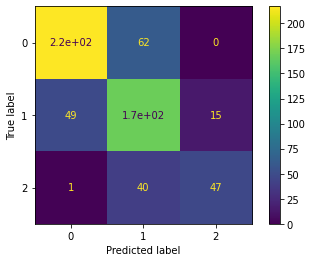

In [ ]:
compute_scores(svm, train_set, test_set, train_label, train_pred, test_label, test_pred)

In [ ]:
# bisogna installare sta roba
# import scikitplot as skplt 
# import matplotlib.pyplot as plt
# plot(skplt.metrics.plot_roc_curve(test_label.values, test_pred_proba))

### Neural Network

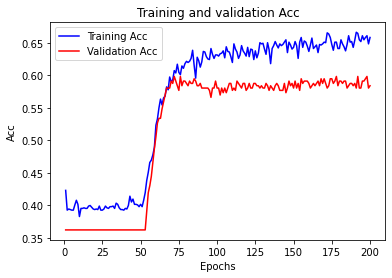

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

         low       0.79      0.78      0.79       279
         med       0.56      0.78      0.65       232
        high       0.00      0.00      0.00        88

    accuracy                           0.66       599
   macro avg       0.45      0.52      0.48       599
weighted avg       0.58      0.66      0.62       599



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(cldf.values)

train_set, test_set, train_label, test_label = train_test_split(cldf, label, stratify=label, test_size=.3)

import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1, X.shape[1])),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adamax',
              loss='mean_squared_error',
              metrics=['accuracy'])

y_train = np.asarray(train_label).astype('float32').reshape((-1,1))
history = model.fit(train_set, y_train,
                    epochs=200,
                    batch_size=512,
                    validation_split=0.2, verbose=0)


import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()


from sklearn.metrics import classification_report
def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred, 
                            target_names=['low', 'med','high']))

test_pred_nn = model.predict_classes(test_set)
report_scores(test_label, test_pred_nn)

### RIPPER

In [ ]:
!pip install wittgenstein

In [ ]:
# Try to classify using RIPPER, a rule based inductive algorithm
import wittgenstein as lw
from sklearn.model_selection import GridSearchCV

param_grid = {"prune_size": [0.5, 0.6], "k": [1, 3, 5]}
ripper = lw.RIPPER()

grid_search_cv = GridSearchCV(estimator=ripper, param_grid=param_grid, verbose=1)
grid_search_cv.fit(train_set, train_label, pos_class=2, n_jobs=-1)

ripper = grid_search_cv.best_estimator_
ripper

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   29.0s finished


<RIPPER(k=1, n_discretize_bins=10, max_rules=None, verbosity=0, dl_allowance=64, max_rule_conds=None, random_state=None, prune_size=0.5, max_total_conds=None)>

In [ ]:
# Predict using the decision tree
train_pred = ripper.predict(train_set)
test_pred = ripper.predict(test_set)

In [ ]:
compute_scores(ripper, train_set, test_set, train_label, train_pred, test_label, test_pred)

=== TRAINING SET ===
Accuracy: 0.4888888888888889
Precision: 0.33593240743477354
Recall: 0.4888888888888889
F1 Score: 0.355832188818333
Support: (array([0.51594896, 0.24822695, 0.        ]), array([0.99845679, 0.06469501, 0.        ]), array([0.68033649, 0.1026393 , 0.        ]), array([648, 541, 206]))

=== TEST SET ===
Accuracy: 0.5008347245409015
Precision: 0.36306929377784414
Recall: 0.5008347245409015
F1 Score: 0.37530829762792534
Support: (array([0.52641509, 0.30434783, 0.        ]), array([1.        , 0.09051724, 0.        ]), array([0.68974042, 0.13953488, 0.        ]), array([279, 232,  88]))

=== CLASSIFICATION REPORT ===
                 precision    recall  f1-score   support

   low-spending       0.53      1.00      0.69       279
medium-spending       0.30      0.09      0.14       232
  high-spending       0.00      0.00      0.00        88

       accuracy                           0.50       599
      macro avg       0.28      0.36      0.28       599
   weighted avg 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AttributeError: ignored